<h1 align="center"> Pobabilistic Graphical Models: pgmpy </h1>


## Qué son los modelos de gráficos probabilísticos (PGMs)?

Los modelos gráficos probabilísticos nos permiten representar distribuciones de probabilidad conjuntas de manera eficiente y también realizar operaciones sobre ellas en menor complejidad de tiempo. En PGM aprovechamos la relación entre las variables aleatorias para obtener una representación compacta.


##Mayor parte de los Modelos Probabilísticos.

* __Bayesian Model__: Los Modelos Bayesianos se utilizan principalmente cuando tenemos una relación causal entre las variables.
* __Markov Model__: Cuando existe una relación no causal entre las variables.

## Bayesian Model

Una red bayesiana consta de un grafo dirigido y un
distribución de probabilidad condicional asociada con cada una de las variables aleatorias. UNA
La red bayesiana se utiliza principalmente cuando existe una relación causal entre
variables aleatorias.

Un ejemplo de una red bayesiana que representa a un estudiante que realiza algún curso.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


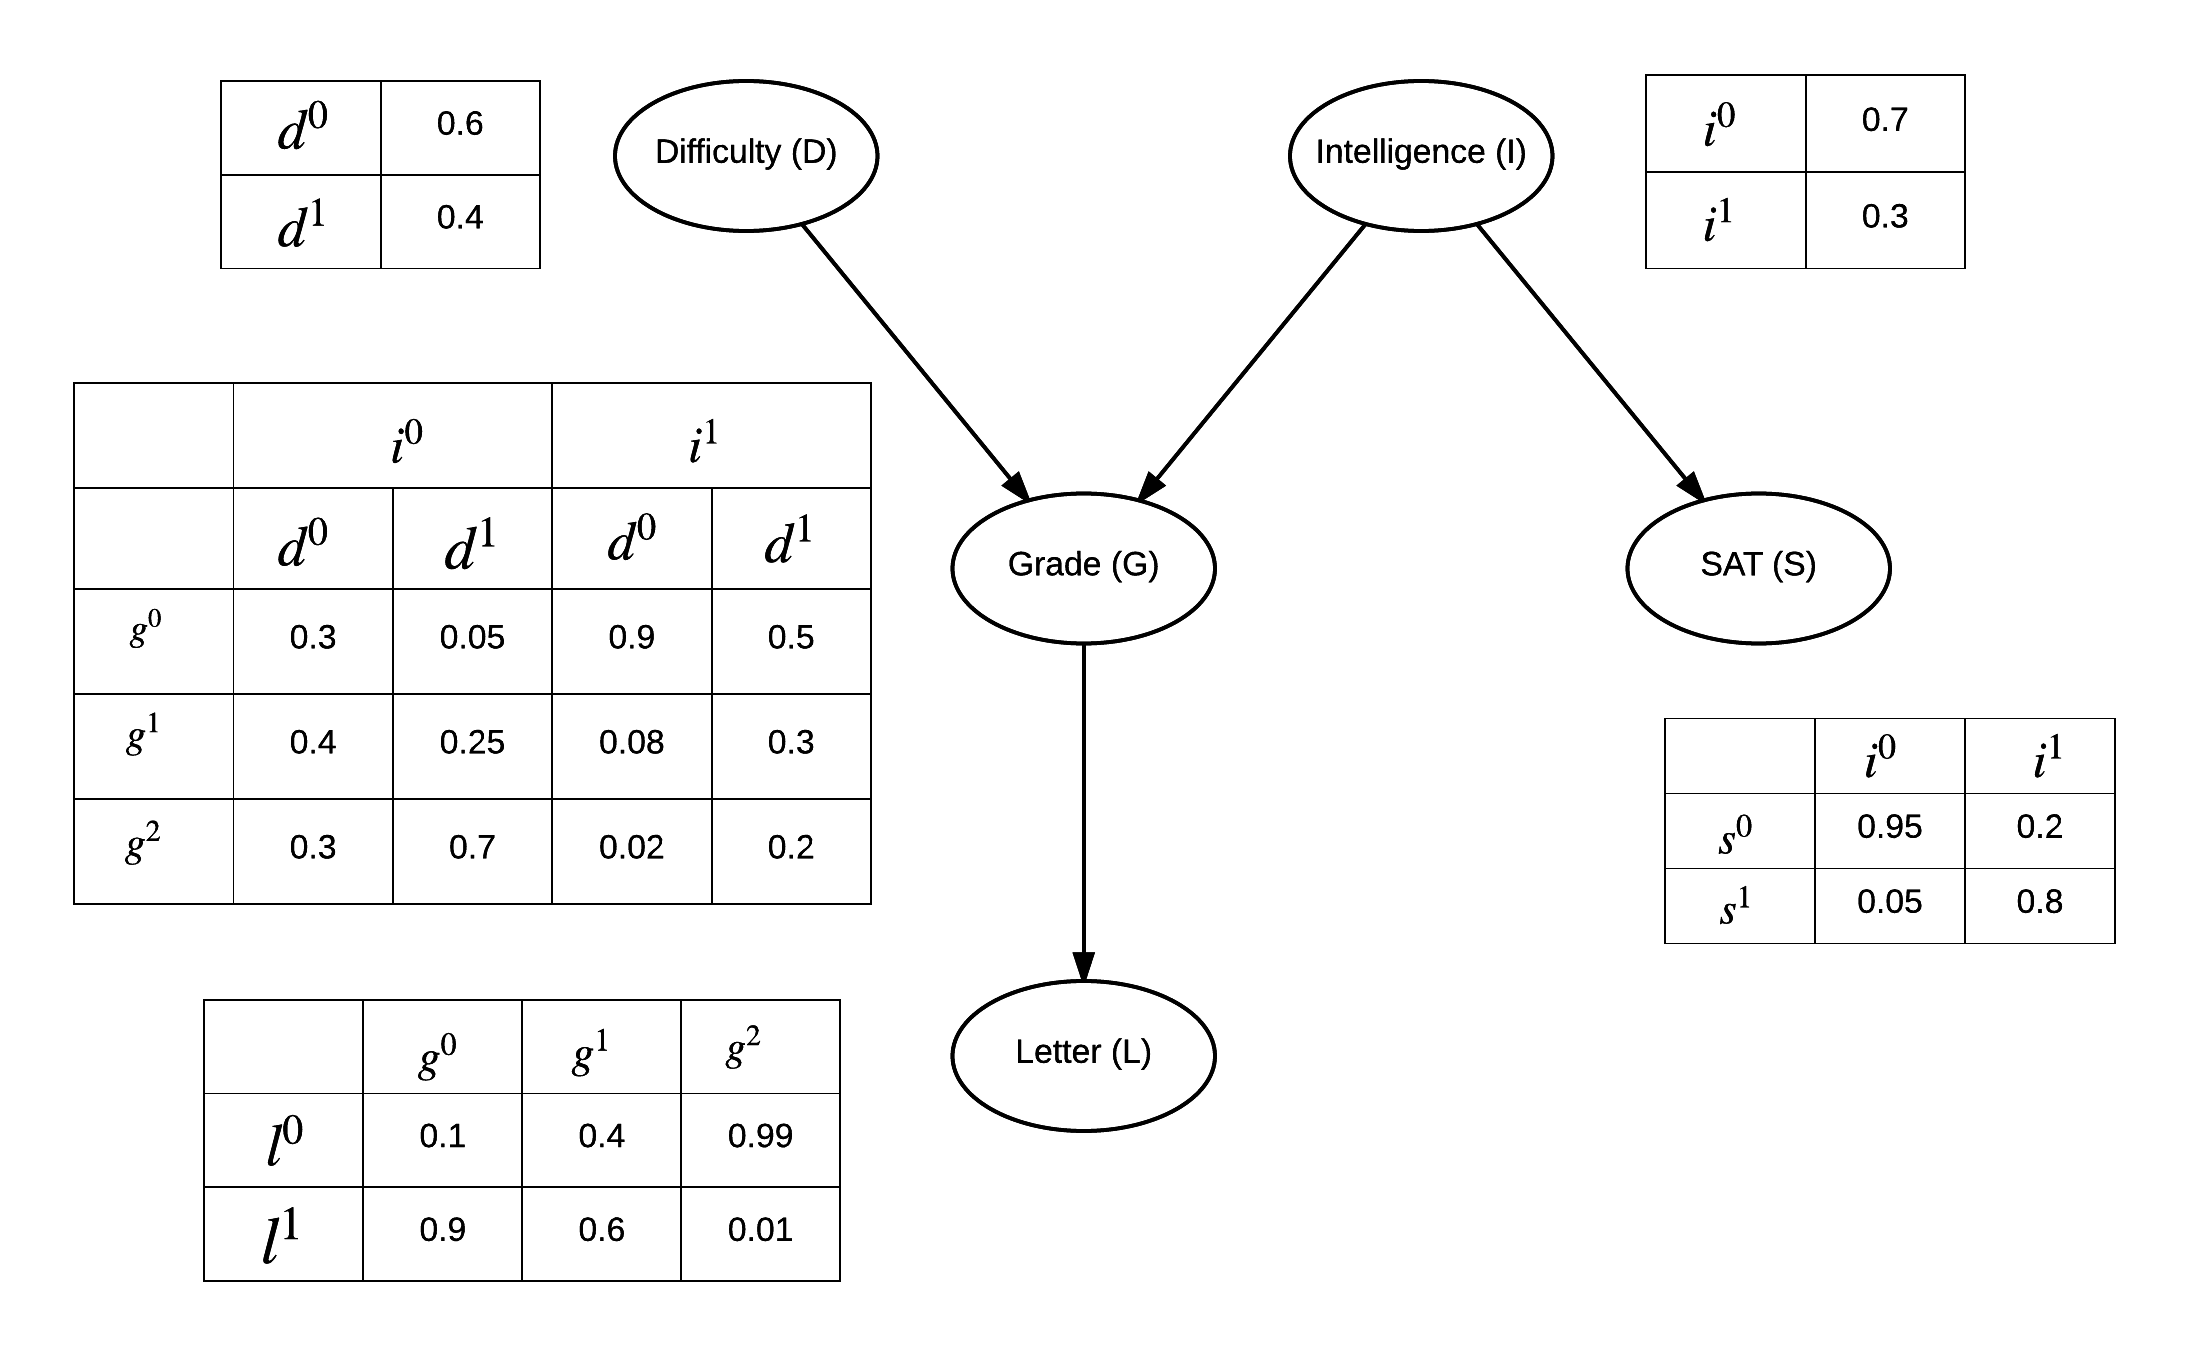

In [2]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/BME/BME_CLASES/DIRECTIVOS/BME PGM/figure1.png')

##Creando modelos bayesianos con PGMPY

In [3]:
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 4.9 MB/s 


In [4]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete.CPD import TabularCPD
   
student_model = BayesianModel([('D', 'G'), ('I', 'G'), 
                               ('G', 'L'), ('I', 'S')])

difficulty_cpd = TabularCPD(variable='D', variable_card=2, 
                            values=[[0.6], [0.4]])
intel_cpd = TabularCPD(variable='I', variable_card=2, 
                       values=[[0.7], [0.3]])
grade_cpd = TabularCPD(variable='G', variable_card=3,
                       values=[[0.3, 0.05, 0.9, 0.5],
                               [0.4, 0.25, 0.08, 0.3],
                               [0.3, 0.7, 0.02, 0.2]],
                       evidence=['I', 'D'], evidence_card=[2, 2])

letter_cpd = TabularCPD(variable='L', variable_card=2,
                        values=[[0.1, 0.4, 0.99],
                                [0.9, 0.6, 0.01]],
                        evidence=['G'], evidence_card=[3])
sat_cpd = TabularCPD(variable='S', variable_card=2,
                     values=[[0.95, 0.2],
                             [0.05, 0.8]],
                     evidence=['I'], evidence_card=[2])
   
student_model.add_cpds(grade_cpd, difficulty_cpd, 
                       intel_cpd, letter_cpd, sat_cpd)

In [5]:
student_model.nodes()

NodeView(('D', 'G', 'I', 'L', 'S'))

In [6]:
student_model.edges()

OutEdgeView([('D', 'G'), ('G', 'L'), ('I', 'G'), ('I', 'S')])

In [7]:
student_model.get_cpds()

[<TabularCPD representing P(G:3 | I:2, D:2) at 0x7fc21c602590>,
 <TabularCPD representing P(D:2) at 0x7fc277125390>,
 <TabularCPD representing P(I:2) at 0x7fc277125210>,
 <TabularCPD representing P(L:2 | G:3) at 0x7fc277125190>,
 <TabularCPD representing P(S:2 | I:2) at 0x7fc20d465fd0>]

In [8]:
print(student_model.get_cpds('L'))

+------+------+------+------+
| G    | G(0) | G(1) | G(2) |
+------+------+------+------+
| L(0) | 0.1  | 0.4  | 0.99 |
+------+------+------+------+
| L(1) | 0.9  | 0.6  | 0.01 |
+------+------+------+------+


## Independencias en Modelos Bayesianos

In [9]:
student_model.local_independencies('G')

(G ⟂ S | D, I)

##Parameter Learning

Creating model from raw data. pgmpy gives a direct method for computing the parameters of a Bayesian Network using fit method.

In [10]:
import numpy as np
import pandas as pd

# Asimimos que todas las variables tienen 2 valores
raw_data = np.random.randint(low=0, high=2, size=(1000, 5))
data = pd.DataFrame(raw_data, columns=['D', 'I', 'G', 'S', 'L'])

train_data = data[:750]

student_model = BayesianModel([('D', 'G'), ('I', 'G'), 
                               ('G', 'L'), ('I', 'S')])
student_model.fit(train_data)
student_model.get_cpds()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[<TabularCPD representing P(D:2) at 0x7fc1f9c66810>,
 <TabularCPD representing P(G:2 | D:2, I:2) at 0x7fc1f9c7bf10>,
 <TabularCPD representing P(I:2) at 0x7fc20bf687d0>,
 <TabularCPD representing P(L:2 | G:2) at 0x7fc1fc6f2fd0>,
 <TabularCPD representing P(S:2 | I:2) at 0x7fc1fc6e35d0>]

In [ ]:
print(student_model.get_cpds('G'))

+------+-------+--------------------+---------------------+---------------------+
| D    | D(0)  | D(0)               | D(1)                | D(1)                |
+------+-------+--------------------+---------------------+---------------------+
| I    | I(0)  | I(1)               | I(0)                | I(1)                |
+------+-------+--------------------+---------------------+---------------------+
| G(0) | 0.535 | 0.4720812182741117 | 0.5082872928176796  | 0.46511627906976744 |
+------+-------+--------------------+---------------------+---------------------+
| G(1) | 0.465 | 0.5279187817258884 | 0.49171270718232046 | 0.5348837209302325  |
+------+-------+--------------------+---------------------+---------------------+


##Inferencia

La inferencia nos permite realizar consultas en estas redes para predecir valores sobre nuevos datos.


In [11]:
from pgmpy.inference import VariableElimination

model_infer = VariableElimination(student_model)

# Inferencia sin ninguna evidencia
results = model_infer.query(['D'])
results.values

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


array([0.52, 0.48])

In [12]:
# Inferencia dada una observación
results = model_infer.query(['D'], evidence={'I': 0, 'G': 0, 'L': 1, 'S': 1})
print(results.values)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

[0.54255362 0.45744638]


La clase de inferencia también admite consultas MAP.

In [13]:
model_infer.map_query(['D'])

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


{'D': 0}

In [14]:
model_infer.map_query(['D'], evidence={'I': 0, 'G': 0, 'L': 1, 'S': 1})['D']

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


0

De lo contrario, podemos usar directamente el método de predicción en la clase de modelo en lugar de crear un objeto de clase de inferencia.

In [15]:
test_data = data[750:]
g = test_data.loc[:,"G"].copy()
test_data = test_data.drop('G', axis=1)
results = student_model.predict(test_data)
results["label"] = g.values
results.head()

100%|██████████| 16/16 [00:03<00:00,  4.57it/s]


G  label
0  1      0
1  1      1
2  1      1
3  1      0
4  0      1